In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pathlib import Path
from scipy.stats import linregress

In [100]:
# File to Load (Remember to Change These)
sleep_data_to_load = Path("Resources/Sleep_Efficiency_Sleep.csv")
sleep_health_data_to_load = Path("Resources/Sleep Health Lifestyle.csv")

# Read School and Student Data File and store into Pandas DataFrames
sleep_data = pd.read_csv(sleep_data_to_load)
sleep_health_data = pd.read_csv(sleep_health_data_to_load)
sleep_data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,1:00:00 AM,7:00:00 AM,6.0,0.88,18,70,12,0,0,0,Yes,3
1,2,69,Male,2:00:00 AM,9:00:00 AM,7.0,0.66,19,28,53,3,0,3,Yes,3
2,3,40,Female,9:30:00 PM,5:30:00 AM,8.0,0.89,20,70,10,1,0,0,No,3
3,4,40,Female,2:30:00 AM,8:30:00 AM,6.0,0.51,23,25,52,3,50,5,Yes,1
4,5,57,Male,1:00:00 AM,9:00:00 AM,8.0,0.76,27,55,18,3,0,3,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,10:00:00 PM,5:30:00 AM,7.5,0.91,22,57,21,0,0,0,No,5
448,449,52,Male,9:00:00 PM,3:00:00 AM,6.0,0.74,28,57,15,4,25,0,No,3
449,450,40,Female,11:00:00 PM,7:30:00 AM,8.5,0.55,20,32,48,1,0,3,Yes,0
450,451,45,Male,9:00:00 PM,4:00:00 AM,7.0,0.76,18,72,10,3,0,0,No,3


In [112]:
# Reorganize the columns using double brackets
organized_df = sleep_data[["ID","Gender","Sleep duration","Sleep efficiency", "Age"]]
organized_df.head()

,ID,Gender,Sleep duration,Sleep efficiency,Age
0,1,Female,6.0,0.88,65
1,2,Male,7.0,0.66,69
2,3,Female,8.0,0.89,40
3,4,Female,6.0,0.51,40
4,5,Male,8.0,0.76,57


In [102]:
sleep_health_data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep (1-10),Physical Activity Level (1-100),Stress Level (1-10),BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [103]:
# Use .rename(columns={}) to rename columns
renamed_df = sleep_health_data.rename(columns={"Person ID":"ID", "Quality of Sleep (1-10)":"Sleep efficiency", "Sleep Duration": "Sleep duration"})
renamed_df

,ID,Gender,Age,Occupation,Sleep duration,Sleep efficiency,Physical Activity Level (1-100),Stress Level (1-10),BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [108]:
sleep_data['Sleep efficiency'] = sleep_data['Sleep efficiency'].astype(float)
renamed_df['Sleep efficiency'] = renamed_df['Sleep efficiency'].astype(float)

In [113]:
# Combine the data into a single dataset.
sleep_data_complete = pd.merge(organized_df, renamed_df, how="outer", on=["ID", "Age", "Gender", "Sleep duration", "Sleep efficiency", "Age"])
sleep_data_complete

,ID,Gender,Sleep duration,Sleep efficiency,Age,Occupation,Physical Activity Level (1-100),Stress Level (1-10),BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,6.1,6.00,27,Software Engineer,42.0,6.0,Overweight,126/83,77.0,4200.0,NaN
1,1,Female,6.0,0.88,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Male,6.2,6.00,28,Doctor,60.0,8.0,Normal,125/80,75.0,10000.0,NaN
3,2,Male,7.0,0.66,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,Male,6.2,6.00,28,Doctor,60.0,8.0,Normal,125/80,75.0,10000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,448,Female,7.5,0.91,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,449,Male,6.0,0.74,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,450,Female,8.5,0.55,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,451,Male,7.0,0.76,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


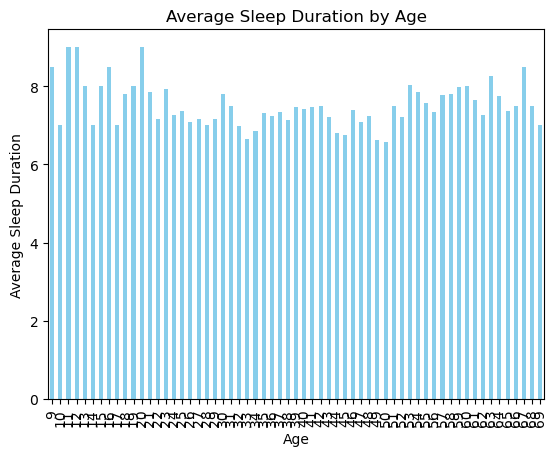

In [115]:
sleep_bar = sleep_data_complete.groupby('Age')['Sleep duration'].mean()

sleep_bar.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Average Sleep Duration')
plt.title('Average Sleep Duration by Age')
plt.show()